In [1]:
from tensorflow import keras

In [3]:
# Load Reuters dataset (top 10,000 most frequent words)
(x_train,y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10000)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))
print("Max label index:", max(y_train))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 8982
Test samples: 2246
Max label index: 45


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=46)
y_test = to_categorical(y_test, num_classes=46)

In [10]:
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=200),
    keras.layers.SpatialDropout1D(0.2),     # Better for text embeddings
    keras.layers.GlobalAveragePooling1D(),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(46, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                   epochs=30,
                   batch_size=512,
                   validation_split=0.2)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 614ms/step - accuracy: 0.2865 - loss: 3.2980 - val_accuracy: 0.3495 - val_loss: 2.5366
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 608ms/step - accuracy: 0.3474 - loss: 2.5803 - val_accuracy: 0.3717 - val_loss: 2.3773
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 584ms/step - accuracy: 0.3878 - loss: 2.4062 - val_accuracy: 0.3901 - val_loss: 2.2657
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 603ms/step - accuracy: 0.3996 - loss: 2.3203 - val_accuracy: 0.4129 - val_loss: 2.1568
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 599ms/step - accuracy: 0.4285 - loss: 2.2016 - val_accuracy: 0.4446 - val_loss: 2.0730
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 523ms/step - accuracy: 0.4484 - loss: 2.1457 - val_accuracy: 0.4641 - val_loss: 2.0152
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 604ms/step - accuracy: 0.4641 - loss: 2.0618 - val_accuracy: 0.4930 - val_loss: 1.9638
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 611ms/step - accuracy: 0.4904 - loss: 2.0234 - val_accuracy: 0

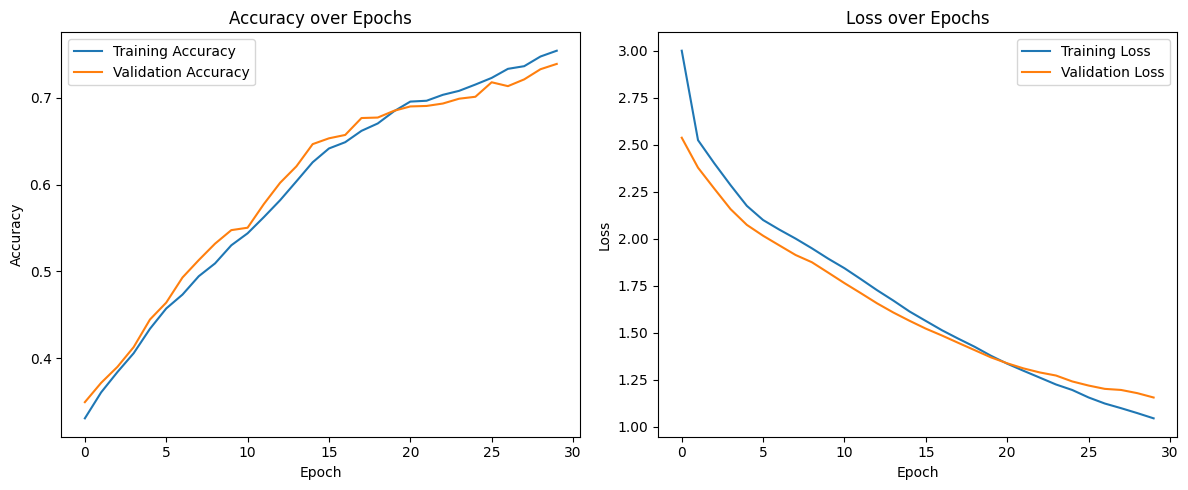

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()